# impot

In [8]:
#pip install opencv-python-headless pandas numpy matplotlib ultralytics


In [9]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO, checks
checks()

Ultralytics YOLOv8.2.63 🚀 Python-3.9.19 torch-2.3.1 CPU (Apple M3 Pro)
Setup complete ✅ (12 CPUs, 18.0 GB RAM, 89.9/460.4 GB disk)


In [10]:
import torch

def check_mps_availability():
    if torch.backends.mps.is_available():
        print("이 장치에서 MPS (GPU 가속)를 사용할 수 있습니다.")
    else:
        print("MPS를 사용할 수 없습니다. CPU를 사용합니다.")

check_mps_availability()


이 장치에서 MPS (GPU 가속)를 사용할 수 있습니다.


In [11]:
from ultralytics import YOLO
import torch

# Check if MPS (Metal Performance Shaders) is available
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using device: {device}')

# Load YOLO model and specify the device
model = YOLO('yolov8n.pt')  # Load a YOLO model
model.to(device)  # Move the model to the specified device

# Perform inference
image_path = "/Users/nogeon-u/Downloads/자동차 사진.jpg" # Replace with the path to your image
results = model(image_path)  # Perform inference

# Print results
print(results)

Using device: mps

image 1/1 /Users/nogeon-u/Downloads/자동차 사진.jpg: 480x640 1 truck, 231.2ms
Speed: 9.7ms preprocess, 231.2ms inference, 77.0ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: '

# Mac이 GPU 사용이 가능하지 확인


In [5]:
# torch 다운로드 확인
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.2307, 0.1352, 0.5559],
        [0.2913, 0.8989, 0.7757],
        [0.4967, 0.7102, 0.8405],
        [0.9660, 0.1464, 0.7705],
        [0.7939, 0.5198, 0.3996]])


In [6]:
# GPU Acceleration Check
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [7]:
import torch

# PyTorch 버전 확인
print("PyTorch Version:", torch.__version__)

# CUDA 사용 가능한지 확인
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("CUDA Version:", torch.version.cuda)
    print("Number of GPUs:", torch.cuda.device_count())
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("No GPU available.")

PyTorch Version: 2.3.1
CUDA available: False
No GPU available.


## 두 코드 모두 True 값이 나오면 build가 되었고, 현재 개발환경에서 사용이 가능하다는 의미이다.

In [14]:
# build 및 사용 유무 확인
torch.backends.mps.is_built() 
torch.backends.mps.is_available()

True

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
# device 변수 선언
device = torch.device("mps")

# Yolo import

In [8]:
# Install the ultralytics package using pip
!pip install ultralytics --upgrade

In [9]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
### 영상 출력 함수
def fn_imshow(img, axis='on', **kwargs):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(**kwargs)
    if axis!='on': plt.axis('off')
    plt.imshow(img_rgb)
    plt.show()

In [11]:
from ultralytics import YOLO, checks

In [12]:
checks()

Ultralytics YOLOv8.2.63 🚀 Python-3.9.19 torch-2.3.1 CPU (Apple M3 Pro)
Setup complete ✅ (12 CPUs, 18.0 GB RAM, 89.9/460.4 GB disk)


In [13]:
# Load a model
model = YOLO('yolov8s.yaml').load('yolov8s.pt') # build from YAML and transfer weights

Transferred 355/355 items from pretrained weights


In [27]:
# Train the model
model.train(data=r"/Users/nogeon-u/Desktop/yolo_car/car.v1i.yolov8/data.yaml",
            epochs=100,
           pretrained='yolov8s.pt',
            batch=-1,
            imgsz=640,
            patience=100,
            project='car1_pt')

Ultralytics YOLOv8.2.58 🚀 Python-3.9.19 torch-2.3.1 CPU (Apple M3 Pro)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/Users/nogeon-u/Desktop/yolo_car/car.v1i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=car1_pt, name=train2, exist_ok=False, pretrained=yolov8s.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /Users/nogeon-u/Desktop/yolo_car/car.v1i.yolov8/train/labels.cache... 137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 137/137 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 128, len(boxes) = 141. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /Users/nogeon-u/Desktop/yolo_car/car.v1i.yolov8/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 33, len(boxes) = 34. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to car1_pt/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to car1_pt/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.365      4.851      1.634         33        640:  33%|███▎      | 3/9 [00:56<01:53, 18.87s/it]


KeyboardInterrupt: 

In [10]:
from ultralytics import YOLO
import torch

# Check if MPS (Metal Performance Shaders) is available
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using device: {device}')

# Load YOLO model and specify the device
model = YOLO('yolov8n.pt')  # Load a YOLO model
model.to(device)  # Move the model to the specified device

# Perform inference
image_path = "/Users/nogeon-u/Downloads/자동차 사진.jpg"  # Replace with the path to your image
results = model(image_path)  # Perform inference

# Print results
print(results)

# Train the model
model.train(data='/Users/nogeon-u/Desktop/yolo_car/car.v1i.yolov8/data.yaml',
            epochs=100,
            pretrained='yolov8s.pt',
            batch=-1,
            imgsz=640,
            patience=100,
            project='car1_pt')

# Save the model
model.save('trained_model.pt')


Using device: mps

image 1/1 /Users/nogeon-u/Downloads/자동차 사진.jpg: 480x640 1 truck, 17.4ms
Speed: 1.7ms preprocess, 17.4ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bow

train: Scanning /Users/nogeon-u/Desktop/yolo_car/car.v1i.yolov8/train/labels.cache... 137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 137/137 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 128, len(boxes) = 141. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /Users/nogeon-u/Desktop/yolo_car/car.v1i.yolov8/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 33, len(boxes) = 34. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to car1_pt/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to car1_pt/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      3.228      4.333      2.915         19        640: 100%|██████████| 9/9 [00:23<00:00,  2.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.01s/it]

                   all         34         34   0.000203     0.0392    0.00298   0.000339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      2.735      3.811      2.509         17        640: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.45s/it]

                   all         34         34    0.00126      0.176      0.045    0.00736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G       2.19      3.016      2.219         18        640: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.42s/it]

                   all         34         34    0.00135      0.137     0.0351    0.00576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.779      2.666      1.852         18        640: 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.63s/it]

                   all         34         34   0.000697     0.0392    0.00457    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G       1.59      2.396      1.797         18        640: 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.57s/it]

                   all         34         34    0.00168     0.0196    0.00691   0.000691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.517      2.214      1.687         15        640: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         34         34    0.00397     0.0196    0.00647    0.00194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.336      1.962       1.63         12        640: 100%|██████████| 9/9 [00:13<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all         34         34    0.00337     0.0196     0.0199      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.264      1.797      1.498         21        640: 100%|██████████| 9/9 [00:11<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all         34         34        0.2     0.0196     0.0315     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.229      1.743      1.481         15        640: 100%|██████████| 9/9 [00:15<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]

                   all         34         34      0.988     0.0196     0.0235     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G        1.2      1.732      1.464         24        640: 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.94s/it]

                   all         34         34     0.0871     0.0286     0.0256     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.153      1.651      1.424         22        640: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.78s/it]

                   all         34         34      0.261     0.0196     0.0205    0.00416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.175        1.6      1.425         21        640: 100%|██████████| 9/9 [00:16<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.46s/it]

                   all         34         34      0.987     0.0196     0.0189     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.159      1.565      1.424         16        640: 100%|██████████| 9/9 [00:20<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.32s/it]

                   all         34         34      0.275     0.0752     0.0298     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G        1.1      1.503       1.38         21        640: 100%|██████████| 9/9 [00:18<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.97s/it]

                   all         34         34      0.655     0.0196      0.022     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.075      1.417      1.361         21        640: 100%|██████████| 9/9 [00:21<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.71s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]

                   all         34         34      0.319     0.0196     0.0217     0.0154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.9835      1.399      1.361         19        640: 100%|██████████| 9/9 [00:18<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]

                   all         34         34      0.655     0.0196     0.0204     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.9738       1.39      1.279         18        640: 100%|██████████| 9/9 [00:19<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.20s/it]

                   all         34         34      0.657     0.0196     0.0208     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.068      1.432      1.334         12        640: 100%|██████████| 9/9 [00:21<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.29s/it]

                   all         34         34      0.657     0.0196     0.0201      0.017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.9491      1.284       1.33         13        640: 100%|██████████| 9/9 [00:17<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.22s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]

                   all         34         34      0.657     0.0196     0.0227     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.9732      1.269      1.299         16        640: 100%|██████████| 9/9 [00:17<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.28s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.43s/it]

                   all         34         34      0.989     0.0196     0.0194     0.0153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.9533      1.212      1.281         22        640: 100%|██████████| 9/9 [00:26<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.27s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.90s/it]

                   all         34         34      0.265     0.0752     0.0268     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.9125      1.203      1.265         22        640: 100%|██████████| 9/9 [00:19<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.08s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]

                   all         34         34       0.99     0.0196     0.0188     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.9671       1.17       1.26         16        640: 100%|██████████| 9/9 [00:21<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.74s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.60s/it]

                   all         34         34      0.313     0.0752     0.0331     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      0.908      1.069      1.237         23        640: 100%|██████████| 9/9 [00:19<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.63s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.67s/it]

                   all         34         34      0.657     0.0196     0.0194      0.017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.8888      1.104      1.283         26        640: 100%|██████████| 9/9 [00:21<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.74s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.73s/it]


                   all         34         34      0.657     0.0196     0.0188     0.0169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.8478      1.102      1.239         17        640: 100%|██████████| 9/9 [00:22<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.39s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.35s/it]

                   all         34         34      0.658     0.0196     0.0205      0.017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.8853      1.062      1.275         19        640: 100%|██████████| 9/9 [00:19<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.20s/it]

                   all         34         34      0.306     0.0196     0.0197     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.8704       1.08      1.219         22        640: 100%|██████████| 9/9 [00:19<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.40s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.15s/it]

                   all         34         34      0.658     0.0196      0.019     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.8421      1.043      1.209         16        640: 100%|██████████| 9/9 [00:19<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.88s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]

                   all         34         34      0.991     0.0196     0.0196     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.8451      1.022       1.22         17        640: 100%|██████████| 9/9 [00:20<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.95s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.97s/it]

                   all         34         34      0.218       0.07     0.0271     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.8899     0.9753      1.235         22        640: 100%|██████████| 9/9 [00:18<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.48s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]

                   all         34         34      0.658     0.0196     0.0187     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.7805     0.9091      1.154         24        640: 100%|██████████| 9/9 [00:25<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.95s/it]

                   all         34         34      0.658     0.0196     0.0186      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.8184     0.9332      1.227         17        640: 100%|██████████| 9/9 [00:20<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.26s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.11s/it]

                   all         34         34      0.991     0.0196     0.0185      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      0.874     0.8908      1.276         16        640: 100%|██████████| 9/9 [00:24<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.29s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.08s/it]

                   all         34         34      0.991     0.0196     0.0186     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.8286     0.9006      1.227         18        640: 100%|██████████| 9/9 [00:16<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.76s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.98s/it]

                   all         34         34      0.658     0.0196     0.0186     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.8157     0.8713      1.201         21        640: 100%|██████████| 9/9 [00:29<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.59s/it]

                   all         34         34      0.658     0.0196     0.0186     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.7716     0.8714      1.169         22        640: 100%|██████████| 9/9 [00:24<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.38s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         34         34      0.324     0.0196     0.0186     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.8193     0.8867      1.227         18        640: 100%|██████████| 9/9 [00:25<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.35s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.33s/it]


                   all         34         34      0.991     0.0196     0.0188     0.0169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.8007     0.8176      1.206         14        640: 100%|██████████| 9/9 [00:26<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.58s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.06s/it]

                   all         34         34      0.658     0.0196     0.0188     0.0188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.7568     0.8122      1.191         18        640: 100%|██████████| 9/9 [00:37<00:00,  4.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:06<00:06,  6.07s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.27s/it]


                   all         34         34      0.658     0.0196     0.0186     0.0131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.7724     0.7917      1.153         13        640: 100%|██████████| 9/9 [00:30<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.70s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]

                   all         34         34      0.991     0.0196     0.0187      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.7452      0.775      1.178         20        640: 100%|██████████| 9/9 [00:43<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.50s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.94s/it]

                   all         34         34      0.991     0.0196     0.0186     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.7351     0.7729      1.168         16        640: 100%|██████████| 9/9 [00:25<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.87s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.66s/it]


                   all         34         34      0.658     0.0196     0.0187     0.0169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G       0.74     0.7297      1.159         18        640: 100%|██████████| 9/9 [00:35<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:08<00:08,  8.25s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.63s/it]


                   all         34         34      0.991     0.0196     0.0188      0.015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      0.741      0.751      1.149         19        640: 100%|██████████| 9/9 [00:27<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:07<00:07,  7.49s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.07s/it]


                   all         34         34      0.991     0.0196     0.0188      0.015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.7482     0.7282       1.15         16        640: 100%|██████████| 9/9 [00:22<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:07<00:07,  7.13s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.71s/it]


                   all         34         34      0.991     0.0196     0.0187     0.0149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      0.732     0.7221      1.182         16        640: 100%|██████████| 9/9 [00:24<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:08<00:08,  8.99s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.72s/it]


                   all         34         34      0.991     0.0196     0.0187      0.015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.6917     0.7139       1.15         17        640: 100%|██████████| 9/9 [00:22<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.85s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.96s/it]


                   all         34         34      0.991     0.0196     0.0188     0.0132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.6938     0.6922      1.128         18        640: 100%|██████████| 9/9 [00:29<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.56s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.63s/it]


                   all         34         34      0.991     0.0196      0.019     0.0152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.6836     0.6615       1.12         17        640: 100%|██████████| 9/9 [00:30<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:09<00:09,  9.21s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.03s/it]


                   all         34         34      0.991     0.0196     0.0188      0.015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.7256      0.705      1.105         17        640: 100%|██████████| 9/9 [00:33<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:09<00:09,  9.34s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.94s/it]


                   all         34         34      0.991     0.0196     0.0191     0.0152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G        0.7     0.6643      1.125         24        640: 100%|██████████| 9/9 [00:24<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.33s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.14s/it]


                   all         34         34       0.99     0.0196      0.019     0.0171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.6785     0.6673      1.125         18        640: 100%|██████████| 9/9 [00:29<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:12<00:12, 12.85s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.14s/it]


                   all         34         34       0.99     0.0196      0.019     0.0171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.6403     0.6628      1.085         22        640: 100%|██████████| 9/9 [00:41<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:11<00:11, 11.05s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.77s/it]


                   all         34         34      0.991     0.0196     0.0192     0.0172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.6987     0.6902      1.125         18        640: 100%|██████████| 9/9 [00:31<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.79s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.35s/it]


                   all         34         34      0.991     0.0196      0.019     0.0171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.6622     0.6172      1.103         15        640: 100%|██████████| 9/9 [00:37<00:00,  4.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.19s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.55s/it]


                   all         34         34      0.991     0.0196     0.0194     0.0175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.6342     0.6443      1.107         21        640: 100%|██████████| 9/9 [00:29<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.40s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.44s/it]


                   all         34         34      0.991     0.0196     0.0192     0.0173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.6794     0.6578      1.124         21        640: 100%|██████████| 9/9 [00:34<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:11<00:11, 11.50s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.22s/it]


                   all         34         34       0.99     0.0196     0.0192     0.0173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.6346     0.6114      1.116         20        640: 100%|██████████| 9/9 [00:35<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.03s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.50s/it]


                   all         34         34      0.657     0.0196     0.0196     0.0196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.6581     0.6166      1.105         19        640: 100%|██████████| 9/9 [00:35<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:07<00:07,  7.11s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.24s/it]


                   all         34         34      0.656     0.0196     0.0196     0.0157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.6663     0.6387      1.098         19        640: 100%|██████████| 9/9 [00:29<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.43s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]


                   all         34         34      0.655     0.0196     0.0196     0.0156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.6512     0.6287      1.125         15        640: 100%|██████████| 9/9 [00:36<00:00,  4.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:13<00:13, 13.47s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.06s/it]


                   all         34         34      0.323     0.0196     0.0191     0.0153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.6462     0.5825      1.049         19        640: 100%|██████████| 9/9 [00:30<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.14s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.49s/it]


                   all         34         34       0.99     0.0196     0.0193     0.0174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      0.621     0.5776      1.096         16        640: 100%|██████████| 9/9 [00:29<00:00,  3.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:07<00:07,  7.52s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.21s/it]


                   all         34         34       0.99     0.0196     0.0197     0.0158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.5903     0.5651      1.054         10        640: 100%|██████████| 9/9 [00:46<00:00,  5.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:08<00:08,  8.65s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.60s/it]


                   all         34         34       0.99     0.0196     0.0195     0.0195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.6242     0.5879      1.046         22        640: 100%|██████████| 9/9 [00:27<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.49s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.15s/it]


                   all         34         34       0.99     0.0196     0.0195     0.0175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.6244     0.5918      1.095         18        640: 100%|██████████| 9/9 [00:34<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:06<00:06,  6.13s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.03s/it]


                   all         34         34      0.657     0.0196     0.0193     0.0154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.6406      0.603      1.115         14        640: 100%|██████████| 9/9 [00:29<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:09<00:09,  9.91s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.84s/it]


                   all         34         34      0.991     0.0196     0.0196     0.0157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.6141     0.5808      1.064         15        640: 100%|██████████| 9/9 [00:27<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:09<00:09,  9.82s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.98s/it]


                   all         34         34      0.991     0.0196     0.0196     0.0157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.5862     0.5618      1.059         22        640: 100%|██████████| 9/9 [00:27<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:07<00:07,  7.23s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.52s/it]


                   all         34         34      0.991     0.0196     0.0201     0.0181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.5921     0.5467      1.094         24        640: 100%|██████████| 9/9 [00:32<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:09<00:09,  9.22s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  6.00s/it]


                   all         34         34      0.991     0.0196     0.0218     0.0197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.6375     0.5883      1.104         22        640: 100%|██████████| 9/9 [00:44<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:11<00:11, 11.72s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.37s/it]


                   all         34         34      0.991     0.0196     0.0212     0.0169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.5903     0.5568       1.05         21        640: 100%|██████████| 9/9 [00:35<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:11<00:11, 11.26s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.62s/it]


                   all         34         34      0.991     0.0196     0.0207     0.0166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.5862     0.5583      1.066         21        640: 100%|██████████| 9/9 [00:31<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:09<00:09,  9.75s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]


                   all         34         34      0.658     0.0196      0.021     0.0168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.5762     0.5434      1.057         26        640: 100%|██████████| 9/9 [00:30<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.55s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.61s/it]


                   all         34         34      0.324     0.0196     0.0204     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.6029     0.5455      1.076         16        640: 100%|██████████| 9/9 [00:32<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.02s/it]


                   all         34         34      0.658     0.0196     0.0208     0.0146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.5561     0.5363      1.057         19        640: 100%|██████████| 9/9 [00:33<00:00,  3.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.27s/it]


                   all         34         34      0.658     0.0196     0.0205     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.5876     0.5223      1.044         20        640: 100%|██████████| 9/9 [00:33<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:07<00:07,  7.38s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.90s/it]


                   all         34         34      0.991     0.0196     0.0203     0.0142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.5772     0.5363      1.047         17        640: 100%|██████████| 9/9 [00:32<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.40s/it]


                   all         34         34      0.991     0.0196       0.02      0.014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.5918     0.5309      1.065         22        640: 100%|██████████| 9/9 [00:45<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]


                   all         34         34      0.658     0.0196       0.02      0.016

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.5779     0.5343      1.068         19        640: 100%|██████████| 9/9 [00:42<00:00,  4.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.63s/it]


                   all         34         34      0.657     0.0196     0.0202     0.0162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.5827     0.5169      1.052         20        640: 100%|██████████| 9/9 [00:40<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.63s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.79s/it]


                   all         34         34      0.658     0.0196     0.0207     0.0186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.5461     0.5448      1.037         18        640: 100%|██████████| 9/9 [00:32<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.61s/it]


                   all         34         34      0.658     0.0196     0.0204     0.0163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.5378     0.4934      1.057         22        640: 100%|██████████| 9/9 [00:37<00:00,  4.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.57s/it]


                   all         34         34      0.991     0.0196     0.0207     0.0165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.5287     0.4943       1.03         18        640: 100%|██████████| 9/9 [00:36<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.39s/it]


                   all         34         34      0.658     0.0196      0.021     0.0189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.5736     0.5277      1.022         21        640: 100%|██████████| 9/9 [00:32<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:04<00:04,  4.98s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]


                   all         34         34      0.658     0.0196     0.0211      0.019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.5517     0.5112      1.068         25        640: 100%|██████████| 9/9 [00:28<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.29s/it]


                   all         34         34      0.658     0.0196     0.0207     0.0187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.5395     0.4932      1.038         19        640: 100%|██████████| 9/9 [00:27<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.22s/it]


                   all         34         34      0.324     0.0196     0.0211     0.0169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G       0.56     0.5049      1.019         17        640: 100%|██████████| 9/9 [00:36<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.20s/it]


                   all         34         34      0.324     0.0196     0.0208     0.0167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.5162     0.4801      1.016         22        640: 100%|██████████| 9/9 [00:30<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]


                   all         34         34      0.174     0.0196     0.0347      0.018
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.5401     0.6001      1.048          9        640: 100%|██████████| 9/9 [01:04<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.17s/it]


                   all         34         34      0.174     0.0196     0.0379     0.0179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.4923     0.5486      1.006          9        640: 100%|██████████| 9/9 [00:32<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.69s/it]


                   all         34         34      0.324     0.0196     0.0193     0.0155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.4611     0.5184      1.012          9        640: 100%|██████████| 9/9 [00:38<00:00,  4.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.87s/it]


                   all         34         34      0.175     0.0196     0.0362     0.0168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.4904     0.5337      1.049         10        640: 100%|██████████| 9/9 [00:33<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.29s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.90s/it]


                   all         34         34      0.324     0.0196      0.019     0.0152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.4642     0.5109      1.005          9        640: 100%|██████████| 9/9 [00:37<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.28s/it]


                   all         34         34      0.174     0.0196     0.0315     0.0163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      0.457     0.4989     0.9963         10        640: 100%|██████████| 9/9 [00:31<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


                   all         34         34      0.175     0.0196     0.0324     0.0165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      0.438     0.4998     0.9538          9        640: 100%|██████████| 9/9 [00:39<00:00,  4.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]


                   all         34         34      0.324     0.0196     0.0193     0.0174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.4576     0.4862      0.993          9        640: 100%|██████████| 9/9 [00:39<00:00,  4.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.33s/it]


                   all         34         34      0.318      0.114     0.0829      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.4463     0.5032      1.006          9        640: 100%|██████████| 9/9 [00:41<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.60s/it]


                   all         34         34      0.175     0.0196     0.0331     0.0167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.4184     0.4945     0.9808          9        640: 100%|██████████| 9/9 [00:43<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.50s/it]


                   all         34         34      0.175     0.0196     0.0291     0.0162

100 epochs completed in 1.080 hours.
Optimizer stripped from car1_pt/train3/weights/last.pt, 6.3MB
Optimizer stripped from car1_pt/train3/weights/best.pt, 6.3MB

Validating car1_pt/train3/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.9.19 torch-2.3.1 MPS (Apple M3 Pro)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.25s/it]


                   all         34         34      0.353      0.193      0.162      0.115
- - v1 2024-07-16 8-28am          6          6      0.161      0.167     0.0687    0.00687
asd - v1 2024-07-16 7-21am         11         11          0          0          0          0
            car_number         17         17      0.897      0.412      0.418      0.338
Speed: 4.2ms preprocess, 395.7ms inference, 0.0ms loss, 138.3ms postprocess per image
Results saved to car1_pt/train3


In [12]:
import datetime
import cv2
from ultralytics import YOLO

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)

# Load the custom class names (if applicable)
class_list = ["license_plate"]

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/yolo_car/car1_pt/train3/weights/best.pt')

# Initialize the webcam
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    start = datetime.datetime.now()

    ret, frame = cap.read()
    if not ret:
        print('Cam Error')
        break

    # Run the detection
    detection = model(frame)[0]

    for data in detection.boxes.data.tolist(): # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        label = int(data[5])
        
        # 디버그 로그 추가
        print(f'Detected label: {label}, Total classes: {len(class_list)}')
        
        if label >= len(class_list):
            print(f'Invalid label: {label}, skipping...')
            continue

        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
        cv2.putText(frame, class_list[label]+' '+str(round(confidence, 2)) + '%', (xmin, ymin - 10), cv2.FONT_ITALIC, 1, WHITE, 2)

    end = datetime.datetime.now()

    total = (end - start).total_seconds()
    print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

    fps = f'FPS: {1 / total:.2f}'
    cv2.putText(frame, fps, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


2024-07-23 15:38:10.476 python[2310:83767] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.



0: 480x640 (no detections), 39.4ms
Speed: 1.0ms preprocess, 39.4ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
Time to process 1 frame: 144 milliseconds

0: 480x640 (no detections), 47.2ms
Speed: 0.9ms preprocess, 47.2ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
Time to process 1 frame: 85 milliseconds

0: 480x640 (no detections), 37.6ms
Speed: 0.9ms preprocess, 37.6ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
Time to process 1 frame: 62 milliseconds

0: 480x640 (no detections), 36.4ms
Speed: 0.8ms preprocess, 36.4ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
Time to process 1 frame: 70 milliseconds

0: 480x640 (no detections), 41.5ms
Speed: 0.8ms preprocess, 41.5ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
Time to process 1 frame: 76 milliseconds

0: 480x640 (no detections), 35.0ms
Speed: 0.8ms preprocess, 35.0ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 6

In [13]:
pip install pytesseract


Note: you may need to restart the kernel to use updated packages.


# 번호판 검출 및 저장(근데 한글을 인식하지 못한다)

In [15]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}

def detect_and_recognize(frame):
    global last_plate_text, plate_start_time

    # Convert the frame to RGB (PIL format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    # Run YOLO detection
    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():  # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # Crop the detected license plate
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # Enhance the cropped image for better OCR accuracy
        gray_image = cv2.cvtColor(cropped_array, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR using EasyOCR
        result = reader.readtext(binary_image)
        for (bbox, text, prob) in result:
            print(f'Detected text: {text} (Confidence: {prob:.2f})')

            # Check if this is the same plate as before
            current_time = time.time()
            if text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time[text]
                print(f'Plate {text} has been parked for {duration:.2f} seconds')
            else:
                # New plate detected
                last_plate_text = text
                plate_start_time[text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cv2.cvtColor(cropped_array, cv2.COLOR_RGB2BGR))
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {text}\n')
                print(f'Saved text to file: {text}')

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
            cv2.putText(frame, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

while True:
    ret, frame = cap.read()
    if not ret:
        print('Cam Error')
        break

    start = datetime.datetime.now()

    # Perform detection and recognition
    detect_and_recognize(frame)

    end = datetime.datetime.now()
    total = (end - start).total_seconds()
    print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

    # Display the frame with OpenCV (optional)
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

2024-07-23 15:15:26.677 python[1990:73860] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.



0: 480x640 (no detections), 271.9ms
Speed: 1.7ms preprocess, 271.9ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 464 milliseconds

0: 480x640 (no detections), 264.5ms
Speed: 1.0ms preprocess, 264.5ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 268 milliseconds

0: 480x640 (no detections), 261.0ms
Speed: 0.9ms preprocess, 261.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 264 milliseconds

0: 480x640 (no detections), 260.3ms
Speed: 1.1ms preprocess, 260.3ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 263 milliseconds

0: 480x640 (no detections), 260.3ms
Speed: 0.9ms preprocess, 260.3ms inference, 0.2ms postprocess per image at shape (1, 3, 480

: 

# 번호판 검출 및 저장(한국어로 설정)

In [4]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader with English and Korean support
reader = easyocr.Reader(['en', 'ko'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}

def detect_and_recognize(frame):
    global last_plate_text, plate_start_time

    # Convert the frame to RGB (PIL format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    # Run YOLO detection
    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():  # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # Crop the detected license plate
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # Enhance the cropped image for better OCR accuracy
        gray_image = cv2.cvtColor(cropped_array, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR using EasyOCR
        result = reader.readtext(binary_image)
        for (bbox, text, prob) in result:
            print(f'Detected text: {text} (Confidence: {prob:.2f})')

            # Check if this is the same plate as before
            current_time = time.time()
            if text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time[text]
                print(f'Plate {text} has been parked for {duration:.2f} seconds')
            else:
                # New plate detected
                last_plate_text = text
                plate_start_time[text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cv2.cvtColor(cropped_array, cv2.COLOR_RGB2BGR))
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {text}\n')
                print(f'Saved text to file: {text}')

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
            cv2.putText(frame, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

while True:
    ret, frame = cap.read()
    if not ret:
        print('Cam Error')
        break

    start = datetime.datetime.now()

    # Perform detection and recognition
    detect_and_recognize(frame)

    end = datetime.datetime.now()
    total = (end - start).total_seconds()
    print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

    # Display the frame with OpenCV (optional)
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 282.9ms
Speed: 1.8ms preprocess, 282.9ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 476 milliseconds

0: 480x640 (no detections), 265.5ms
Speed: 1.1ms preprocess, 265.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 270 milliseconds

0: 480x640 (no detections), 269.8ms
Speed: 1.5ms preprocess, 269.8ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 273 milliseconds

0: 480x640 (no detections), 269.0ms
Speed: 1.3ms preprocess, 269.0ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 273 milliseconds

0: 480x640 (no detections), 268.7ms
Speed: 1.3ms preprocess, 268.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480

# Tesseract

In [ ]:
import cv2
import datetime
import time
import os
import sqlite3
from PIL import Image
import numpy as np
import pytesseract

# Tesseract 경로 설정 (필요 시 수정)
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Database setup
conn = sqlite3.connect('license_plates.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS plates
             (timestamp TEXT, plate TEXT)''')
conn.commit()

last_plate_text = ""
plate_start_time = {}

def detect_and_recognize(frame):
    global last_plate_text, plate_start_time

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Use OpenCV's built-in Haar Cascade for license plate detection
    plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
    plates = plate_cascade.detectMultiScale(gray, 1.1, 10)

    detected_any = False

    for (x, y, w, h) in plates:
        detected_any = True

        # Crop the detected license plate
        cropped_image = frame[y:y + h, x:x + w]
        cropped_array = np.array(cropped_image)

        # Convert to PIL Image for OCR
        pil_image = Image.fromarray(cropped_array)

        # OCR using Tesseract
        custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789가나다라마바사아자차카타파하'
        text = pytesseract.image_to_string(pil_image, config=custom_config, lang='kor+eng')
        text = text.strip()

        if text:
            print(f'Detected text: {text}')

            # Check if this is the same plate as before
            current_time = time.time()
            if text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time.get(text, current_time)
                print(f'Plate {text} has been parked for {duration:.2f} seconds')
            else:
                # New plate detected
                last_plate_text = text
                plate_start_time[text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cropped_array)
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {text}\n')
                print(f'Saved text to file: {text}')

                # Insert the detected text into the database
                c.execute("INSERT INTO plates (timestamp, plate) VALUES (?, ?)", (timestamp, text))
                conn.commit()
                print(f'Saved text to database: {text}')

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (x, y), (x + w, y + h), GREEN, 2)
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

while True:
    ret, frame = cap.read()
    if not ret:
        print('Cam Error')
        break

    start = datetime.datetime.now()

    # Perform detection and recognition
    detect_and_recognize(frame)

    end = datetime.datetime.now()
    total = (end - start).total_seconds()
    print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

    # Display the frame with OpenCV (optional)
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Close the database connection
conn.close()


# Test

In [14]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
import cv2
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
# 영상 출력 함수
def fn_imshow(img, axis='on', figsize=(6, 8), **kwargs):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    if axis != 'on':
        plt.axis('off')
    
    # 이미지 크기 가져오기
    height, width, _ = img.shape
    extent = [0, width, height, 0]  # extent 설정
    
    plt.imshow(img_rgb, extent=extent, **kwargs)
    plt.show()

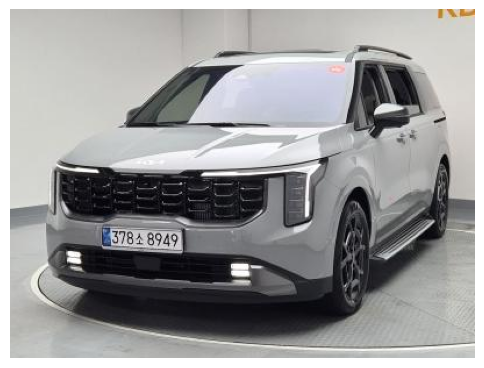

In [17]:
# 예제 이미지 불러오기
img = cv2.imread(r"/Users/nogeon-u/Downloads/자동차 사진.jpg")

# 함수 호출"
fn_imshow(img, axis='off', figsize=(6, 8))

In [18]:
#Load trained YOLOv8n model
pt_path = r"/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt"
model_best = YOLO(pt_path)

In [19]:
# Read an image using OpenCV
src =r"/Users/nogeon-u/Downloads/자동차 사진.jpg"
source = cv2.imread(src)
# Run inference on the source
results = model_best(source)


0: 480x640 1 car_number, 143.9ms
Speed: 1.5ms preprocess, 143.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


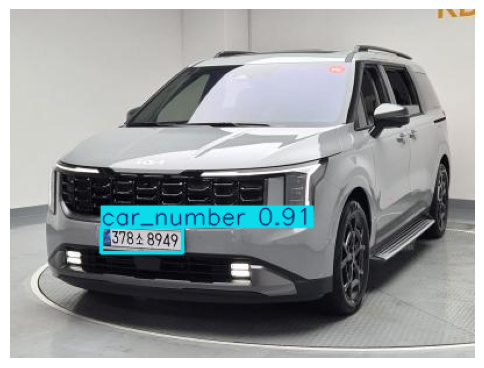

In [20]:
# Plotting results
res_plotted = results[0].plot()
fn_imshow(res_plotted, axis='off', figsize=(6, 8))

In [1]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
import pymysql

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader with Korean language support
reader = easyocr.Reader(['en', 'ko'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}

# Database connection
def connect_to_database():
    try:
        conn = pymysql.connect(
            host="best.hnu.kr",
            user="user_sw2024",
            passwd="sw2024",
            db="db_sw2024",
            cursorclass=pymysql.cursors.DictCursor,
            autocommit=True
        )
        print("Database connected.")
        return conn
    except pymysql.Error as e:
        print(f"Database connection failed: {e}")
        return None

def insert_into_database(conn, datetime, license_plate):
    try:
        with conn.cursor() as cur:
            sql = "INSERT INTO illegal_parking (datetime, license_plate) VALUES (%s, %s)"
            cur.execute(sql, (datetime, license_plate))
            conn.commit()
            print(f"Inserted into database: {datetime}, {license_plate}")
    except pymysql.Error as e:
        print(f"Failed to insert data: {e}")

def detect_and_recognize(frame, conn):
    global last_plate_text, plate_start_time

    # Convert the frame to RGB (PIL format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    # Run YOLO detection
    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():  # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # Crop the detected license plate
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # Enhance the cropped image for better OCR accuracy
        gray_image = cv2.cvtColor(cropped_array, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR using EasyOCR
        result = reader.readtext(binary_image)
        for (bbox, text, prob) in result:
            print(f'Detected text: {text} (Confidence: {prob:.2f})')

            # Check if this is the same plate as before
            current_time = time.time()
            if text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time[text]
                print(f'Plate {text} has been parked for {duration:.2f} seconds')
            else:
                # New plate detected
                last_plate_text = text
                plate_start_time[text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cv2.cvtColor(cropped_array, cv2.COLOR_RGB2BGR))
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {text}\n')
                print(f'Saved text to file: {text}')

                # Insert detected text and timestamp into database
                current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                insert_into_database(conn, current_datetime, text)

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
            cv2.putText(frame, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

def main():
    conn = connect_to_database()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print('Cam Error')
                break

            start = datetime.datetime.now()

            # Perform detection and recognition
            detect_and_recognize(frame, conn)

            end = datetime.datetime.now()
            total = (end - start).total_seconds()
            print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

            # Display the frame with OpenCV (optional)
            cv2.imshow('frame', frame)
            
            if cv2.waitKey(1) == ord('q'):
                break
    except KeyboardInterrupt:
        print("Exit")
    finally:
        cap.release()
        cv2.destroyAllWindows()
        conn.close()

if __name__ == "__main__":
    main()

2024-07-24 14:25:01.549 python[3184:178602] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


Database connected.

0: 480x640 (no detections), 157.4ms
Speed: 1.4ms preprocess, 157.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 529 milliseconds

0: 480x640 (no detections), 138.7ms
Speed: 0.7ms preprocess, 138.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 141 milliseconds

0: 480x640 (no detections), 136.3ms
Speed: 0.8ms preprocess, 136.3ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 139 milliseconds

0: 480x640 (no detections), 135.8ms
Speed: 0.7ms preprocess, 135.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 139 milliseconds

0: 480x640 (no detections), 136.5ms
Speed: 0.8ms preprocess, 136.5ms inference, 0.3ms postprocess per image

: 

# 번호판인식(번호판 지정 함수 사용)

In [5]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
import pymysql
import re

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader with Korean language support
reader = easyocr.Reader(['en', 'ko'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}

# Database connection
def connect_to_database():
    try:
        conn = pymysql.connect(
            host="best.hnu.kr",
            user="user_sw2024",
            passwd="sw2024",
            db="db_sw2024",
            cursorclass=pymysql.cursors.DictCursor,
            autocommit=True
        )
        print("Database connected.")
        return conn
    except pymysql.Error as e:
        print(f"Database connection failed: {e}")
        return None

def insert_into_database(conn, datetime, license_plate):
    try:
        with conn.cursor() as cur:
            sql = "INSERT INTO illegal_parking (datetime, license_plate) VALUES (%s, %s)"
            cur.execute(sql, (datetime, license_plate))
            conn.commit()
            print(f"Inserted into database: {datetime}, {license_plate}")
    except pymysql.Error as e:
        print(f"Failed to insert data: {e}")


def clean_plate_text(text):
    # 정규 표현식을 사용하여 "두 자리 또는 세 자리 숫자 + 한글 한 글자 + 공백 + 네 자리 숫자" 형식의 텍스트만 추출
    match = re.match(r'\d{2,3}[가-힣] \d{4}', text)
    if match:
        return match.group(0)
    return None


def detect_and_recognize(frame, conn):
    global last_plate_text, plate_start_time

    # Convert the frame to RGB (PIL format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    # Run YOLO detection
    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():  # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # Crop the detected license plate
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # Enhance the cropped image for better OCR accuracy
        gray_image = cv2.cvtColor(cropped_array, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR using EasyOCR
        result = reader.readtext(binary_image)
        for (bbox, text, prob) in result:
            print(f'Detected text: {text} (Confidence: {prob:.2f})')

            # Clean the detected text
            cleaned_text = clean_plate_text(text)
            if cleaned_text is None:
                continue

            # Check if this is the same plate as before
            current_time = time.time()
            if cleaned_text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time[cleaned_text]
                print(f'Plate {cleaned_text} has been parked for {duration:.2f} seconds')
            else:
                # New plate detected
                last_plate_text = cleaned_text
                plate_start_time[cleaned_text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cv2.cvtColor(cropped_array, cv2.COLOR_RGB2BGR))
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {cleaned_text}\n')
                print(f'Saved text to file: {cleaned_text}')

                # Insert detected text and timestamp into database
                current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                insert_into_database(conn, current_datetime, cleaned_text)

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
            cv2.putText(frame, cleaned_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

def main():
    conn = connect_to_database()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print('Cam Error')
                break

            start = datetime.datetime.now()

            # Perform detection and recognition
            detect_and_recognize(frame, conn)

            end = datetime.datetime.now()
            total = (end - start).total_seconds()
            print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

            # Display the frame with OpenCV (optional)
            cv2.imshow('frame', frame)
            
            if cv2.waitKey(1) == ord('q'):
                break
    except KeyboardInterrupt:
        print("Exit")
    finally:
        cap.release()
        cv2.destroyAllWindows()
        conn.close()

if __name__ == "__main__":
    main()


Database connected.

0: 480x640 (no detections), 172.6ms
Speed: 1.6ms preprocess, 172.6ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 363 milliseconds

0: 480x640 (no detections), 175.6ms
Speed: 0.8ms preprocess, 175.6ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 178 milliseconds

0: 480x640 (no detections), 136.1ms
Speed: 0.8ms preprocess, 136.1ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 139 milliseconds

0: 480x640 (no detections), 144.1ms
Speed: 0.8ms preprocess, 144.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 147 milliseconds

0: 480x640 (no detections), 147.6ms
Speed: 0.7ms preprocess, 147.6ms inference, 0.2ms postprocess per image

# 같은 번호판인식(5초에 한번씩 데이터전송)

In [5]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
import pymysql
import re

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader with Korean language support
reader = easyocr.Reader(['en', 'ko'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}
last_sent_time = {}

# Database connection
def connect_to_database():
    try:
        conn = pymysql.connect(
            host="best.hnu.kr",
            user="user_sw2024",
            passwd="sw2024",
            db="db_sw2024",
            cursorclass=pymysql.cursors.DictCursor,
            autocommit=True
        )
        print("Database connected.")
        return conn
    except pymysql.Error as e:
        print(f"Database connection failed: {e}")
        return None

def insert_into_database(conn, datetime, license_plate):
    try:
        with conn.cursor() as cur:
            sql = "INSERT INTO illegal_parking (datetime, license_plate) VALUES (%s, %s)"
            cur.execute(sql, (datetime, license_plate))
            conn.commit()
            print(f"Inserted into database: {datetime}, {license_plate}")
    except pymysql.Error as e:
        print(f"Failed to insert data: {e}")

def clean_plate_text(text):
    # 정규 표현식을 사용하여 "두 자리 또는 세 자리 숫자 + 한글 한 글자 + 공백 + 네 자리 숫자" 형식의 텍스트만 추출
    match = re.match(r'\d{2,3}[가-힣] \d{4}', text)
    if match:
        return match.group(0)
    return None

def detect_and_recognize(frame, conn):
    global last_plate_text, plate_start_time, last_sent_time

    # Convert the frame to RGB (PIL format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    # Run YOLO detection
    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():  # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # Crop the detected license plate
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # Enhance the cropped image for better OCR accuracy
        gray_image = cv2.cvtColor(cropped_array, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR using EasyOCR
        result = reader.readtext(binary_image)
        for (bbox, text, prob) in result:
            print(f'Detected text: {text} (Confidence: {prob:.2f})')

            # Clean the detected text
            cleaned_text = clean_plate_text(text)
            if cleaned_text is None:
                continue

            # Check if this is the same plate as before
            current_time = time.time()
            if cleaned_text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time[cleaned_text]
                print(f'Plate {cleaned_text} has been parked for {duration:.2f} seconds')
            else:
                # New plate detected
                last_plate_text = cleaned_text
                plate_start_time[cleaned_text] = current_time

            # Check if 5 seconds have passed since the last insert
            if cleaned_text not in last_sent_time or current_time - last_sent_time[cleaned_text] > 5:
                last_sent_time[cleaned_text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cv2.cvtColor(cropped_array, cv2.COLOR_RGB2BGR))
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {cleaned_text}\n')
                print(f'Saved text to file: {cleaned_text}')

                # Insert detected text and timestamp into database
                current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                insert_into_database(conn, current_datetime, cleaned_text)

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
            cv2.putText(frame, cleaned_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

def main():
    conn = connect_to_database()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print('Cam Error')
                break

            start = datetime.datetime.now()

            # Perform detection and recognition
            detect_and_recognize(frame, conn)

            end = datetime.datetime.now()
            total = (end - start).total_seconds()
            print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')
            

            # Display the frame with OpenCV (optional)
            cv2.imshow('frame', frame)
            
            if cv2.waitKey(1) == ord('q'):
                break
    except KeyboardInterrupt:
        print("Exit")
    finally:
        cap.release()
        cv2.destroyAllWindows()
        conn.close()

if __name__ == "__main__":
    main()


Database connected.

0: 480x640 (no detections), 156.1ms
Speed: 1.7ms preprocess, 156.1ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 376 milliseconds

0: 480x640 (no detections), 134.6ms
Speed: 0.8ms preprocess, 134.6ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 138 milliseconds

0: 480x640 (no detections), 131.5ms
Speed: 1.0ms preprocess, 131.5ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 134 milliseconds

0: 480x640 (no detections), 130.1ms
Speed: 0.6ms preprocess, 130.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 133 milliseconds

0: 480x640 (no detections), 131.2ms
Speed: 0.8ms preprocess, 131.2ms inference, 0.2ms postprocess per image

# 번호판 주정차 여부확인(불법정차,불법주차)

In [ ]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
import pymysql
import re

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader with Korean language support
reader = easyocr.Reader(['en', 'ko'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}
last_sent_time = {}

# Database connection
def connect_to_database():
    try:
        conn = pymysql.connect(
            host="best.hnu.kr",
            user="user_sw2024",
            passwd="sw2024",
            db="db_sw2024",
            cursorclass=pymysql.cursors.DictCursor,
            autocommit=True
        )
        print("Database connected.")
        return conn
    except pymysql.Error as e:
        print(f"Database connection failed: {e}")
        return None

def add_column_to_table(conn):
    try:
        with conn.cursor() as cur:
            sql = "ALTER TABLE illegal_parking ADD COLUMN parking_status VARCHAR(1)"
            cur.execute(sql)
            conn.commit()
            print("Column 'parking_status' added to illegal_parking.")
    except pymysql.Error as e:
        print(f"Failed to add column: {e}")

def insert_into_database(conn, datetime, license_plate, parking_status):
    try:
        with conn.cursor() as cur:
            sql = "INSERT INTO illegal_parking (datetime, license_plate, parking_status) VALUES (%s, %s, %s)"
            cur.execute(sql, (datetime, license_plate, parking_status))
            conn.commit()
            print(f"Inserted into database: {datetime}, {license_plate}, {parking_status}")
    except pymysql.Error as e:
        print(f"Failed to insert data: {e}")

def clean_plate_text(text):
    # 정규 표현식을 사용하여 "두 자리 또는 세 자리 숫자 + 한글 한 글자 + 공백 + 네 자리 숫자" 형식의 텍스트만 추출
    match = re.match(r'\d{2,3}[가-힣] \d{4}', text)
    if match:
        return match.group(0)
    return None

def detect_and_recognize(frame, conn):
    global last_plate_text, plate_start_time, last_sent_time

    # Convert the frame to RGB (PIL format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    # Run YOLO detection
    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():  # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # Crop the detected license plate
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # Enhance the cropped image for better OCR accuracy
        gray_image = cv2.cvtColor(cropped_array, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR using EasyOCR
        result = reader.readtext(binary_image)
        for (bbox, text, prob) in result:
            print(f'Detected text: {text} (Confidence: {prob:.2f})')

            # Clean the detected text
            cleaned_text = clean_plate_text(text)
            if cleaned_text is None:
                continue

            current_time = time.time()
            
            # Check if this is the same plate as before
            if cleaned_text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time[cleaned_text]
                print(f'Plate {cleaned_text} has been parked for {duration:.2f} seconds')
            else:
                # New plate detected
                last_plate_text = cleaned_text
                plate_start_time[cleaned_text] = current_time
                last_sent_time[cleaned_text] = 0  # Initialize last sent time to 0

            # Check if 5 seconds have passed since the last insert
            if cleaned_text not in last_sent_time or current_time - last_sent_time[cleaned_text] > 5:
                last_sent_time[cleaned_text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cv2.cvtColor(cropped_array, cv2.COLOR_RGB2BGR))
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {cleaned_text}\n')
                print(f'Saved text to file: {cleaned_text}')

                # Determine parking status
                parking_status = '불법주차' if current_time - plate_start_time[cleaned_text] >= 30 else '불법정차'

                # Insert detected text and timestamp into database
                current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                insert_into_database(conn, current_datetime, cleaned_text, parking_status)

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
            cv2.putText(frame, cleaned_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

def main():
    conn = connect_to_database()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    # 새로운 컬럼 추가 (필요한 경우)
    add_column_to_table(conn)

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print('Cam Error')
                break

            start = datetime.datetime.now()

            # Perform detection and recognition
            detect_and_recognize(frame, conn)

            end = datetime.datetime.now()
            total = (end - start).total_seconds()
            print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

            # Display the frame with OpenCV (optional)
            cv2.imshow('frame', frame)
            
            if cv2.waitKey(1) == ord('q'):
                break
    except KeyboardInterrupt:
        print("Exit")
    finally:
        cap.release()
        cv2.destroyAllWindows()
        conn.close()

if __name__ == "__main__":
    main()


Database connected.
Failed to add column: (1060, "Duplicate column name 'parking_status'")

0: 480x640 1 car_number, 164.2ms
Speed: 0.8ms preprocess, 164.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
Detected text: 700가 4568 (Confidence: 0.93)
Saved image: detected_plates/detected_plate_20240729_152519.png
Saved text to file: 700가 4568
Failed to insert data: (1406, "Data too long for column 'parking_status' at row 1")
Time to process 1 frame: 402 milliseconds

0: 480x640 1 car_number, 147.5ms
Speed: 0.7ms preprocess, 147.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 150 milliseconds

0: 480x640 1 car_number, 135.8ms
Speed: 0.7ms preprocess, 135.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 138 milliseconds

0: 480x640 2 car_numbers, 134.8ms
Speed: 0.7ms preprocess, 134.8ms inference, 0.3m

# 번호판 주정차 인식(주차 시간까지 입력)

In [2]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
import pymysql
import re

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader with Korean language support
reader = easyocr.Reader(['en', 'ko'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}
last_sent_time = {}

# Database connection
def connect_to_database():
    try:
        conn = pymysql.connect(
            host="best.hnu.kr",
            user="user_sw2024",
            passwd="sw2024",
            db="db_sw2024",
            cursorclass=pymysql.cursors.DictCursor,
            autocommit=True
        )
        print("Database connected.")
        return conn
    except pymysql.Error as e:
        print(f"Database connection failed: {e}")
        return None

def insert_into_database(conn, datetime, license_plate, parking_status, stopping_time):
    try:
        with conn.cursor() as cur:
            sql = "INSERT INTO illegal_parking (datetime, license_plate, parking_status, stopping_time) VALUES (%s, %s, %s, %s)"
            cur.execute(sql, (datetime, license_plate, parking_status, stopping_time))
            conn.commit()
            print(f"Inserted into database: {datetime}, {license_plate}, {parking_status}, {stopping_time}")
    except pymysql.Error as e:
        print(f"Failed to insert data: {e}")

def clean_plate_text(text):
    # 정규 표현식을 사용하여 "두 자리 또는 세 자리 숫자 + 한글 한 글자 + 공백 + 네 자리 숫자" 형식의 텍스트만 추출
    match = re.match(r'\d{2,3}[가-힣] \d{4}', text)
    if match:
        return match.group(0)
    return None

def format_duration(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

def detect_and_recognize(frame, conn):
    global last_plate_text, plate_start_time, last_sent_time

    # Convert the frame to RGB (PIL format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    # Run YOLO detection
    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():  # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # Crop the detected license plate
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # Enhance the cropped image for better OCR accuracy
        gray_image = cv2.cvtColor(cropped_array, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR using EasyOCR
        result = reader.readtext(binary_image)
        for (bbox, text, prob) in result:
            print(f'Detected text: {text} (Confidence: {prob:.2f})')

            # Clean the detected text
            cleaned_text = clean_plate_text(text)
            if cleaned_text is None:
                continue

            current_time = time.time()
            
            # Check if this is the same plate as before
            if cleaned_text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time[cleaned_text]
                stopping_time = format_duration(duration)
                print(f'Plate {cleaned_text} has been parked for {duration:.2f} seconds')
                parking_status = '불법주차' if duration >= 30 else '불법정차'
            else:
                # New plate detected
                last_plate_text = cleaned_text
                plate_start_time[cleaned_text] = current_time
                stopping_time = format_duration(0)
                parking_status = '불법정차'

            # Check if 5 seconds have passed since the last insert
            if cleaned_text not in last_sent_time or current_time - last_sent_time[cleaned_text] > 5:
                last_sent_time[cleaned_text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cv2.cvtColor(cropped_array, cv2.COLOR_RGB2BGR))
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {cleaned_text}\n')
                print(f'Saved text to file: {cleaned_text}')

                # Insert detected text, timestamp, parking status, and stopping time into database
                current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                insert_into_database(conn, current_datetime, cleaned_text, parking_status, stopping_time)

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
            cv2.putText(frame, cleaned_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

def main():
    conn = connect_to_database()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print('Cam Error')
                break

            start = datetime.datetime.now()

            # Perform detection and recognition
            detect_and_recognize(frame, conn)

            end = datetime.datetime.now()
            total = (end - start).total_seconds()
            print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

            # Display the frame with OpenCV (optional)
            cv2.imshow('frame', frame)
            
            if cv2.waitKey(1) == ord('q'):
                break
    except KeyboardInterrupt:
        print("Exit")
    finally:
        cap.release()
        cv2.destroyAllWindows()
        conn.close()

if __name__ == "__main__":
    main()


Database connected.

0: 480x640 (no detections), 143.0ms
Speed: 1.5ms preprocess, 143.0ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 337 milliseconds

0: 480x640 (no detections), 143.0ms
Speed: 0.7ms preprocess, 143.0ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 146 milliseconds

0: 480x640 (no detections), 142.0ms
Speed: 0.7ms preprocess, 142.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 144 milliseconds

0: 480x640 (no detections), 136.8ms
Speed: 0.6ms preprocess, 136.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 139 milliseconds

0: 480x640 (no detections), 137.3ms
Speed: 0.7ms preprocess, 137.3ms inference, 0.3ms postprocess per image

# 이미지 화질개선

In [ ]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
import pymysql
import re

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader with Korean language support
reader = easyocr.Reader(['en', 'ko'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}
last_sent_time = {}

# Database connection
def connect_to_database():
    try:
        conn = pymysql.connect(
            host="best.hnu.kr",
            user="user_sw2024",
            passwd="sw2024",
            db="db_sw2024",
            cursorclass=pymysql.cursors.DictCursor,
            autocommit=True
        )
        print("Database connected.")
        return conn
    except pymysql.Error as e:
        print(f"Database connection failed: {e}")
        return None

def insert_into_database(conn, datetime, license_plate, parking_status, stopping_time):
    try:
        with conn.cursor() as cur:
            sql = "INSERT INTO illegal_parking (datetime, license_plate, parking_status, stopping_time) VALUES (%s, %s, %s, %s)"
            cur.execute(sql, (datetime, license_plate, parking_status, stopping_time))
            conn.commit()
            print(f"Inserted into database: {datetime}, {license_plate}, {parking_status}, {stopping_time}")
    except pymysql.Error as e:
        print(f"Failed to insert data: {e}")

def clean_plate_text(text):
    match = re.match(r'\d{2,3}[가-힣] \d{4}', text)
    if match:
        return match.group(0)
    return None

def format_duration(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

# 이미지 밝기와 대비를 조정하는 함수 
def adjust_brightness_contrast(image, alpha=1.5, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def detect_and_recognize(frame, conn):
    global last_plate_text, plate_start_time, last_sent_time

    # Convert the frame to RGB (PIL format)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    # Run YOLO detection
    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():  # data : [xmin, ymin, xmax, ymax, confidence_score, class_id]
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # Crop the detected license plate
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # Enhance the cropped image by adjusting brightness and contrast
        enhanced_image = adjust_brightness_contrast(cropped_array)

        # Convert to grayscale and apply binary thresholding for OCR
        gray_image = cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR using EasyOCR
        result = reader.readtext(binary_image)
        for (bbox, text, prob) in result:
            print(f'Detected text: {text} (Confidence: {prob:.2f})')

            # Clean the detected text
            cleaned_text = clean_plate_text(text)
            if cleaned_text is None:
                continue

            current_time = time.time()
            
            # Check if this is the same plate as before
            if cleaned_text == last_plate_text:
                # Calculate the parking duration
                duration = current_time - plate_start_time[cleaned_text]
                stopping_time = format_duration(duration)
                print(f'Plate {cleaned_text} has been parked for {duration:.2f} seconds')
                parking_status = '불법주차' if duration >= 30 else '불법정차'
            else:
                # New plate detected
                last_plate_text = cleaned_text
                plate_start_time[cleaned_text] = current_time
                stopping_time = format_duration(0)
                parking_status = '불법정차'

            # Check if 5 seconds have passed since the last insert
            if cleaned_text not in last_sent_time or current_time - last_sent_time[cleaned_text] > 5:
                last_sent_time[cleaned_text] = current_time

                # Save the cropped image
                timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
                detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
                cv2.imwrite(detected_plate_path, cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))
                print(f'Saved image: {detected_plate_path}')

                # Save the detected text to a file
                with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                    f.write(f'{timestamp} {cleaned_text}\n')
                print(f'Saved text to file: {cleaned_text}')

                # Insert detected text, timestamp, parking status, and stopping time into database
                current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                insert_into_database(conn, current_datetime, cleaned_text, parking_status, stopping_time)

            # Draw bounding box and text on the frame
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
            cv2.putText(frame, cleaned_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

def main():
    conn = connect_to_database()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print('Cam Error')
                break

            start = datetime.datetime.now()

            # Perform detection and recognition
            detect_and_recognize(frame, conn)

            end = datetime.datetime.now()
            total = (end - start).total_seconds()
            print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

            # Display the frame with OpenCV (optional)
            cv2.imshow('frame', frame)
            
            if cv2.waitKey(1) == ord('q'):
                break
    except KeyboardInterrupt:
        print("Exit")
    finally:
        cap.release()
        cv2.destroyAllWindows()
        conn.close()

if __name__ == "__main__":
    main()


# 처리 전 ocr결과

In [1]:
import datetime
import time
import os
from PIL import Image
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
import pymysql
import re

# Configuration
CONFIDENCE_THRESHOLD = 0.6
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)
SAVE_DIR = 'detected_plates'
os.makedirs(SAVE_DIR, exist_ok=True)

# Load the custom YOLO model
model = YOLO('/Users/nogeon-u/Desktop/New_car2_pt/train2/weights/best.pt')

# Initialize EasyOCR Reader with Korean language support
reader = easyocr.Reader(['en', 'ko'])

# Initialize the webcam using OpenCV just for video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

last_plate_text = ""
plate_start_time = {}
last_sent_time = {}

# Database connection
def connect_to_database():
    try:
        conn = pymysql.connect(
            host="best.hnu.kr",
            user="user_sw2024",
            passwd="sw2024",
            db="db_sw2024",
            cursorclass=pymysql.cursors.DictCursor,
            autocommit=True
        )
        print("Database connected.")
        return conn
    except pymysql.Error as e:
        print(f"Database connection failed: {e}")
        return None

def insert_into_database(conn, datetime, license_plate, parking_status, stopping_time):
    try:
        with conn.cursor() as cur:
            sql = "INSERT INTO illegal_parking (datetime, license_plate, parking_status, stopping_time) VALUES (%s, %s, %s, %s)"
            cur.execute(sql, (datetime, license_plate, parking_status, stopping_time))
            conn.commit()
            print(f"Inserted into database: {datetime}, {license_plate}, {parking_status}, {stopping_time}")
    except pymysql.Error as e:
        print(f"Failed to insert data: {e}")

def clean_plate_text(text):
    match = re.match(r'\d{2,3}[가-힣] \d{4}', text)
    if match:
        return match.group(0)
    return None

def format_duration(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

def adjust_brightness_contrast(image, alpha=1.5, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def remove_blur(image):
    return cv2.GaussianBlur(image, (0, 0), 3)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def enhance_image(image, save_dir, timestamp):
    adjusted = adjust_brightness_contrast(image, alpha=1.5, beta=0)
    adjusted_path = os.path.join(save_dir, f'enhanced_adjusted_{timestamp}.png')
    cv2.imwrite(adjusted_path, cv2.cvtColor(adjusted, cv2.COLOR_RGB2BGR))
    
    deblurred = remove_blur(adjusted)
    deblurred_path = os.path.join(save_dir, f'enhanced_deblurred_{timestamp}.png')
    cv2.imwrite(deblurred_path, cv2.cvtColor(deblurred, cv2.COLOR_RGB2BGR))
    
    sharpened = sharpen_image(deblurred)
    sharpened_path = os.path.join(save_dir, f'enhanced_sharpened_{timestamp}.png')
    cv2.imwrite(sharpened_path, cv2.cvtColor(sharpened, cv2.COLOR_RGB2BGR))
    
    return sharpened

def detect_and_recognize(frame, conn):
    global last_plate_text, plate_start_time, last_sent_time

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)

    detection = model(rgb_frame)[0]

    detected_any = False

    for data in detection.boxes.data.tolist():
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue

        detected_any = True

        xmin, ymin, xmax, ymax = map(int, data[:4])

        # 검출된 번호판 영역을 크롭
        cropped_image = pil_image.crop((xmin, ymin, xmax, ymax))
        cropped_array = np.array(cropped_image)

        # 처리 전 OCR 수행
        result = reader.readtext(cropped_array)
        print("처리 전 OCR 결과:")
        for (bbox, text, prob) in result:
            print(f'감지된 텍스트: {text} (신뢰도: {prob:.2f})')

        # 이미지 선명화 수행
        timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
        enhanced_image = enhance_image(cropped_array, SAVE_DIR, timestamp)
        gray_image = cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2GRAY)
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # 처리 후 OCR 수행
        result = reader.readtext(binary_image)
        print("처리 후 OCR 결과:")
        for (bbox, text, prob) in result:
            print(f'감지된 텍스트: {text} (신뢰도: {prob:.2f})')

        # 이후의 코드 계속...

        cleaned_text = clean_plate_text(text)
        if cleaned_text is None:
            continue

        current_time = time.time()
        
        if cleaned_text == last_plate_text:
            duration = current_time - plate_start_time[cleaned_text]
            stopping_time = format_duration(duration)
            print(f'Plate {cleaned_text} has been parked for {duration:.2f} seconds')
            parking_status = '불법주차' if duration >= 30 else '불법정차'
        else:
            last_plate_text = cleaned_text
            plate_start_time[cleaned_text] = current_time
            stopping_time = format_duration(0)
            parking_status = '불법정차'

        if cleaned_text not in last_sent_time or current_time - last_sent_time[cleaned_text] > 5:
            last_sent_time[cleaned_text] = current_time

            detected_plate_path = os.path.join(SAVE_DIR, f'detected_plate_{timestamp}.png')
            cv2.imwrite(detected_plate_path, cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))
            print(f'Saved image: {detected_plate_path}')

            with open(os.path.join(SAVE_DIR, 'detected_plates.txt'), 'a') as f:
                f.write(f'{timestamp} {cleaned_text}\n')
            print(f'Saved text to file: {cleaned_text}')

            current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            insert_into_database(conn, current_datetime, cleaned_text, parking_status, stopping_time)

        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
        cv2.putText(frame, cleaned_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, WHITE, 2)

    if not detected_any:
        print('No license plate detected in this frame.')

def main():
    conn = connect_to_database()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print('Cam Error')
                break

            start = datetime.datetime.now()

            detect_and_recognize(frame, conn)

            end = datetime.datetime.now()
            total = (end - start).total_seconds()
            print(f'Time to process 1 frame: {total * 1000:.0f} milliseconds')

            cv2.imshow('frame', frame)
            
            if cv2.waitKey(1) == ord('q'):
                break
    except KeyboardInterrupt:
        print("Exit")
    finally:
        cap.release()
        cv2.destroyAllWindows()
        conn.close()

if __name__ == "__main__":
    main()


2024-08-09 15:23:04.084 python[55779:4593114] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


Database connected.

0: 480x640 (no detections), 166.0ms
Speed: 1.3ms preprocess, 166.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 650 milliseconds

0: 480x640 (no detections), 143.7ms
Speed: 0.7ms preprocess, 143.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 147 milliseconds

0: 480x640 (no detections), 143.2ms
Speed: 0.9ms preprocess, 143.2ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 146 milliseconds

0: 480x640 (no detections), 142.0ms
Speed: 0.9ms preprocess, 142.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
No license plate detected in this frame.
Time to process 1 frame: 145 milliseconds

0: 480x640 (no detections), 144.6ms
Speed: 1.2ms preprocess, 144.6ms inference, 0.2ms postprocess per image

In [1]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/Users/nogeon-u/Desktop/sw_불법주정차/yolo_car/detected_plates/detected_plate_20240807_180344.png')

# Step 1: Adjust brightness and contrast
alpha = 1.5  # Contrast control
beta = 20    # Brightness control
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Step 2: Convert to grayscale
gray = cv2.cvtColor(adjusted, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Sharpen the image
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(blurred, -1, kernel)

# Step 5: Apply binary thresholding to get a binary image
_, binary_image = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Save the processed image
cv2.imwrite('/mnt/data/image_processed.png', binary_image)

# Display the processed image
cv2.imshow('Processed Image', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
